In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')

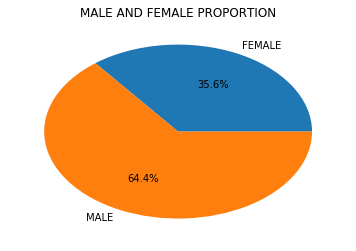

In [4]:
f_data_info = titanic[titanic['sex'] == 'female'].count()
m_data_info = titanic[titanic['sex'] == 'male'].count()
count = [f_data_info[3],m_data_info[3]]
label = ['FEMALE','MALE']
plt.pie(count,labels = label,autopct = '%.1f%%')
plt.title("MALE AND FEMALE PROPORTION")
plt.show()

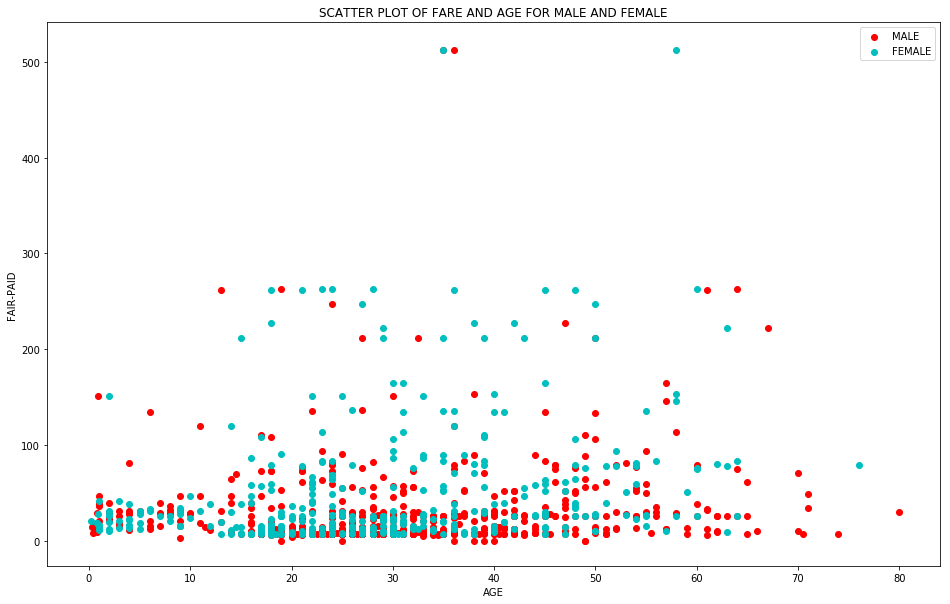

In [6]:
#Create as scatterplot with the fair paid andthe age, differ the plot color by gender.
df = titanic.dropna(subset=['age','fare'])
m_fairPaid = df[df['sex'] == 'male']['fare']
m_age = df[df['sex'] == 'male']['age']
f_fairPaid = df[df['sex'] == 'female']['fare']
f_age = df[df['sex'] == 'female']['age']
plt.figure(figsize=(16,10))
plt.scatter(m_age,m_fairPaid,color = "r",label="MALE")
plt.scatter(f_age,f_fairPaid,color = "c",label="FEMALE")
plt.xlabel("AGE")
plt.ylabel("FAIR-PAID")
plt.title("SCATTER PLOT OF FARE AND AGE FOR MALE AND FEMALE")
plt.legend()
plt.show()

In [7]:
df1 = pd.DataFrame({'From_To': ['LoNDon_paris','MAdrid_miLAN','londON_StockhOlm','Budapest_PaRis','Brusseels_londOn'],'FlightNumber':[10045,np.nan,10065,np.nan,10085],'RecentDelays':[[23,47],[],[24,43,87],[13],[67,32]],'Airline':['KLM(!)','<Air France>(12)','(British Airways.)','12.Air France','"SwissAir"']})

In [8]:
#some values in the FlightNumber columnare missing. These numbers are meant to increase by 10with each row so 10055 and 
#10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float 
#column).
for i in range(df1['From_To'].count()):
    if(np.isnan(df1['FlightNumber'][i])):
        df1['FlightNumber'][i] = ((df1['FlightNumber'][0])+(10*i))
    else:
        next
df1['FlightNumber'] = df1['FlightNumber'].astype('int64')
df1

C:\Users\sande\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France>(12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways.)
3,Budapest_PaRis,10075,[13],12.Air France
4,Brusseels_londOn,10085,"[67, 32]","""SwissAir"""


In [9]:
#The FromTo column would be better as two separates columns! split each string on the underscore delimiter to give 
#a new temprory DataFrame with the correct values. Assign the correct column names to this temporary Data Frame.
df_temp = pd.DataFrame()
df_temp['From'] = df1['From_To'].str.split('_').str[0]
df_temp['To'] = df1['From_To'].str.split('_').str[1]
df_temp

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brusseels,londOn


In [10]:

data = []
for row in df_temp['From']:
    data.append(row.title())
df_temp['From'] = data
data = []
for row in df_temp['To']:
    data.append(row.title())
df_temp['To'] = data
df_temp

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brusseels,London


In [11]:

# "From_To" column drop from data frame "df1" permanently
df1.drop(columns='From_To',inplace=True)
column = df_temp.columns
column
for x in column:
    df1[x] = df_temp[x]
    
df1

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France>(12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways.),London,Stockholm
3,10075,[13],12.Air France,Budapest,Paris
4,10085,"[67, 32]","""SwissAir""",Brusseels,London


In [12]:
element = 0
for row in df1['RecentDelays']:
    count = len(row)
    if(count > element):
        element = count
    else:
        next
for i in range(element):
    data = []
    for row in df1['RecentDelays']:
        if (len(row) >= (i+1)):
            data.append(row[i])
        else:
            data.append(np.nan)
    df1['Delays_'+str(i+1)] = data
# "RecentDelays" column drop from data frame "df1" permanently
df1.drop(columns='RecentDelays',inplace=True)
df1

,FlightNumber,Airline,From,To,Delays_1,Delays_2,Delays_3
0,10045,KLM(!),London,Paris,23.0,47.0,NaN
1,10055,<Air France>(12),Madrid,Milan,NaN,NaN,NaN
2,10065,(British Airways.),London,Stockholm,24.0,43.0,87.0
3,10075,12.Air France,Budapest,Paris,13.0,NaN,NaN
4,10085,"""SwissAir""",Brusseels,London,67.0,32.0,NaN
